# Predicting Churn for telecom customer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn

In [2]:
raw_data= pd.read_csv('Telco-Customer-Churn.csv')
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
raw_data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,5134-IKDAY,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [4]:
raw_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### No missing value in the dataset

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total Charges are actually numeric values. So, we need to change the object dtype to int or float. And for exploring the data with respect to the Churn, we need to change the velues for Churn too.(that is getting dummies)

In [6]:
raw_data['TotalCharges']=pd.to_numeric(raw_data['TotalCharges'], errors='coerce')
raw_data['Churn']
temp=pd.get_dummies(raw_data['Churn'])
raw_data['Churn']=temp['Yes']

In [7]:
raw_data.replace([np.inf,-np.inf], 0)
raw_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##### But infinite values were present in the total charges column

# Exploring TotalCharges

In [8]:
print("Percentage of 'TotalCharges' missing values %.2f" %(raw_data['TotalCharges'].isnull().sum()/raw_data.shape[0]*100))

Percentage of 'TotalCharges' missing values 0.16


That is a very less number. We can delete these values.

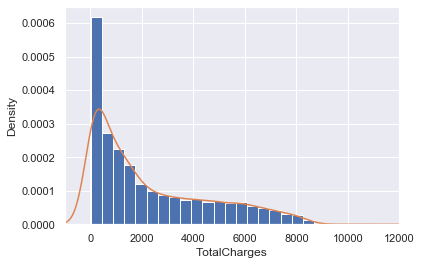

In [9]:
ax=raw_data['TotalCharges'].hist(bins=20, density=True)
raw_data['TotalCharges'].plot(kind='density')
ax.set(xlabel='TotalCharges')
plt.xlim(-1000,12000)
plt.show()

The curve is right skewed. So null values should be filled with median instead of mean.

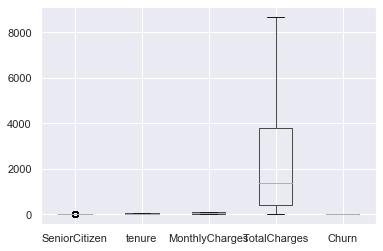

In [10]:
raw_data.boxplot()

Total charges doesn't seem to have any outliers

In [11]:
print("median: ",raw_data['TotalCharges'].median(skipna=True))
print("mean: ",raw_data['TotalCharges'].mean(skipna=True))

median:  1397.475
mean:  2283.3004408418697


In [12]:
data=raw_data.copy()
data['TotalCharges'].fillna(raw_data['TotalCharges'].median(skipna=True), inplace=True)

In [13]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data with dummies for categorical variables

In [14]:
data.drop(['customerID'],axis=1, inplace=True)
data=pd.get_dummies(data, drop_first=True)
data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


# Exploring raw data

### Correlation Check

In [15]:
corr_matrix= raw_data.corr()
corr_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,0.150889
tenure,0.016567,1.000000,0.247900,0.825880,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,0.193356
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150889,-0.352229,0.193356,-0.199484,1.000000


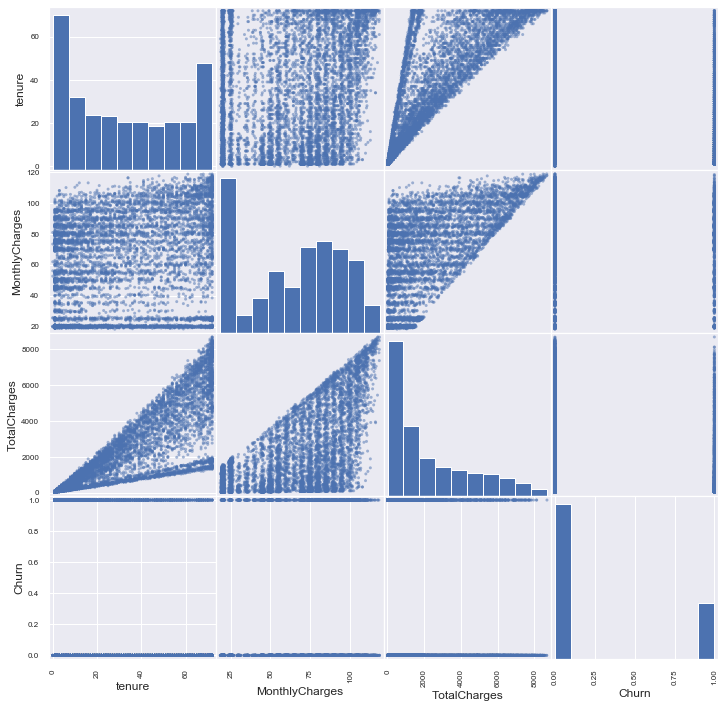

In [16]:
attributes=['tenure', 'MonthlyCharges', 'TotalCharges','Churn']
from pandas.plotting import scatter_matrix
scatter_matrix(raw_data[attributes], figsize=(12,12))
plt.show()

#### TotalCharges is highly correlated with tenure & MonthlyCharges

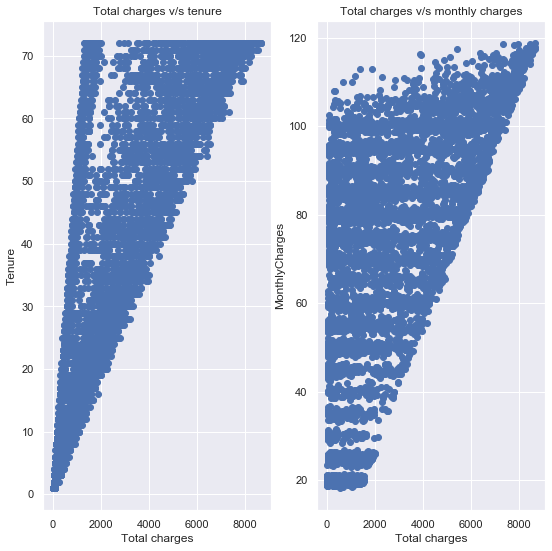

In [17]:
#Plotting scatter plots of Total charge with tenure and monthly charges to get a better visualization of data

fig,ax=plt.subplots(1,2,figsize=(9,9))
ax[0].scatter(raw_data['TotalCharges'],raw_data['tenure'])
ax[0].set_title('Total charges v/s tenure')
ax[0].set_xlabel('Total charges')
ax[0].set_ylabel('Tenure')
ax[1].scatter(raw_data['TotalCharges'],raw_data['MonthlyCharges'])
ax[1].set_title('Total charges v/s monthly charges')
ax[1].set_xlabel('Total charges')
ax[1].set_ylabel('MonthlyCharges')
plt.show()

# Exploration of tenure

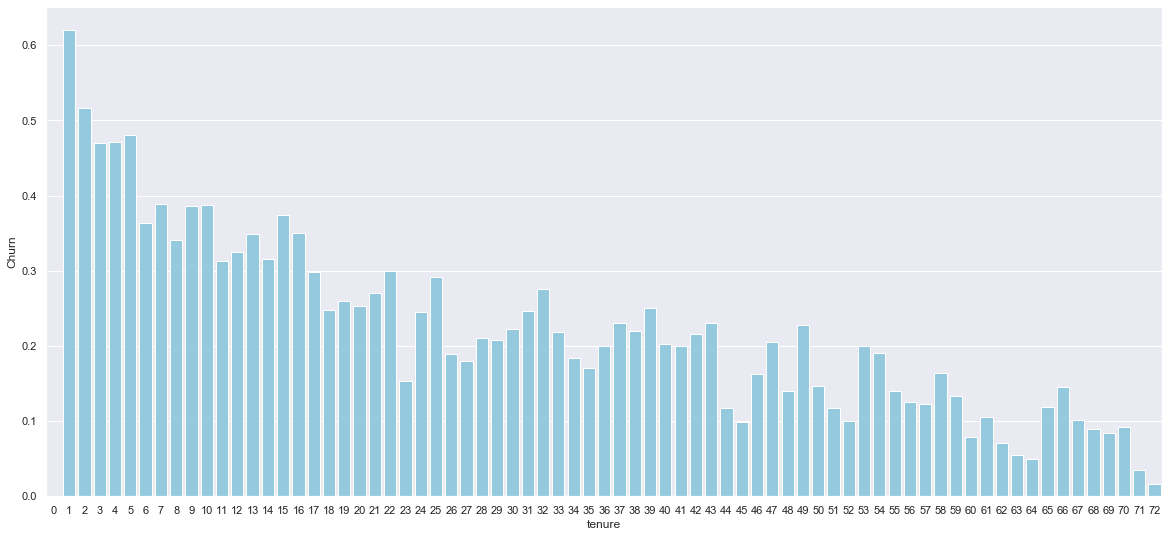

In [18]:
plt.figure(figsize=(20,9))
churn_by_tenure=raw_data[['tenure','Churn']].groupby(['tenure'],as_index=False).mean()
sns.barplot(x='tenure',y='Churn', data=churn_by_tenure, color='Skyblue')
plt.show()

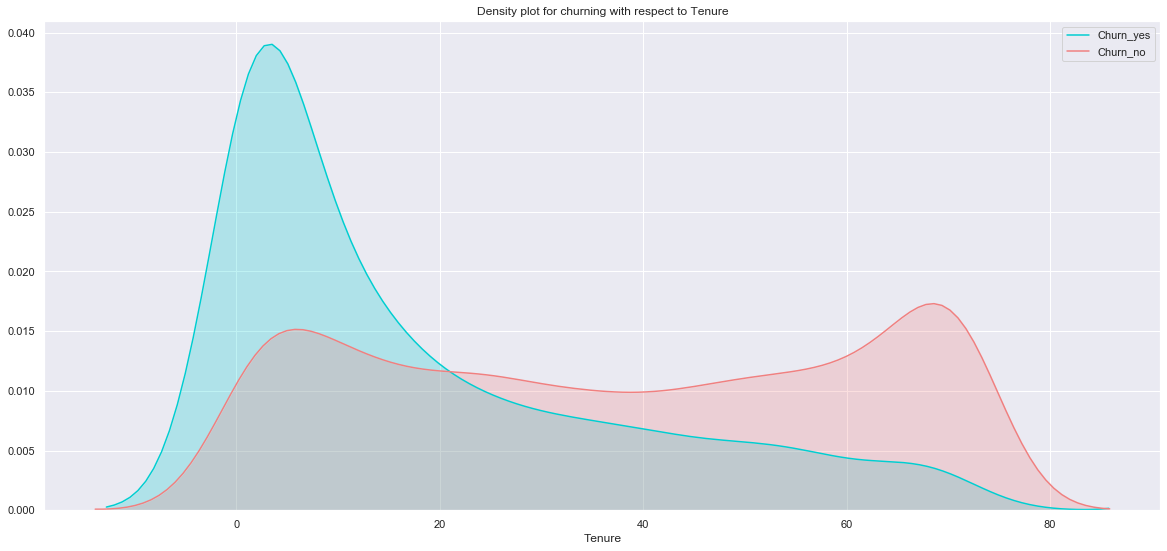

In [19]:
plt.figure(figsize=(20,9))
ax=sns.kdeplot(raw_data['tenure'][raw_data.Churn==1],color='darkturquoise', shade=True)
sns.kdeplot(raw_data['tenure'][raw_data.Churn==0],color='lightcoral', shade=True)
plt.legend(['Churn_yes','Churn_no'])
plt.title('Density plot for churning with respect to Tenure')
ax.set(xlabel='Tenure')
plt.show()

The distributions are very much different for the tenure v/s Churn. So this might be a significant predictor in our model.

# Exploration of Total Charges

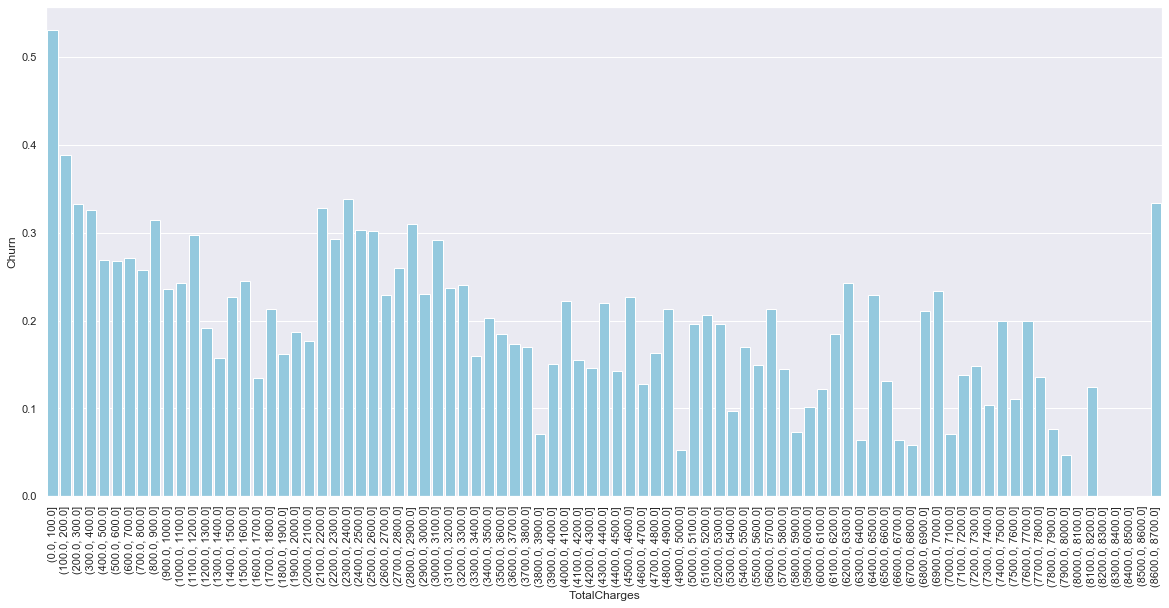

In [20]:
plt.figure(figsize=(20,9))
churn_by_totalcharges=raw_data[['TotalCharges','Churn']].groupby(pd.cut(raw_data['TotalCharges'], 
                                                                  np.arange(0,raw_data['TotalCharges'].max()+100.0,100.0))).mean()
ax=sns.barplot(x='TotalCharges',y='Churn', data=churn_by_totalcharges, color='Skyblue')
ax.set_xticklabels(churn_by_totalcharges.index,rotation=90)
plt.show()


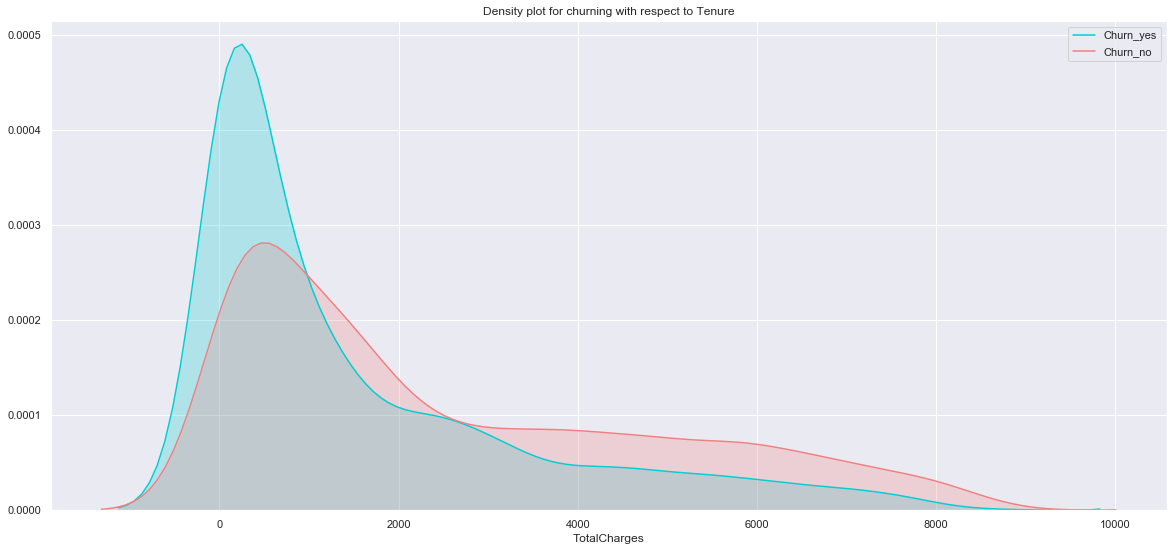

In [21]:
plt.figure(figsize=(20,9))
ax=sns.kdeplot(raw_data['TotalCharges'][raw_data.Churn==1],color='darkturquoise', shade=True)
sns.kdeplot(raw_data['TotalCharges'][raw_data.Churn==0],color='lightcoral', shade=True)
plt.legend(['Churn_yes','Churn_no'])
plt.title('Density plot for churning with respect to Tenure')
ax.set(xlabel='TotalCharges')
plt.show()

The distributions are very much different for the total charges v/s Churn. So this might be a significant predictor in our model

# Exploration of MonthlyCharges

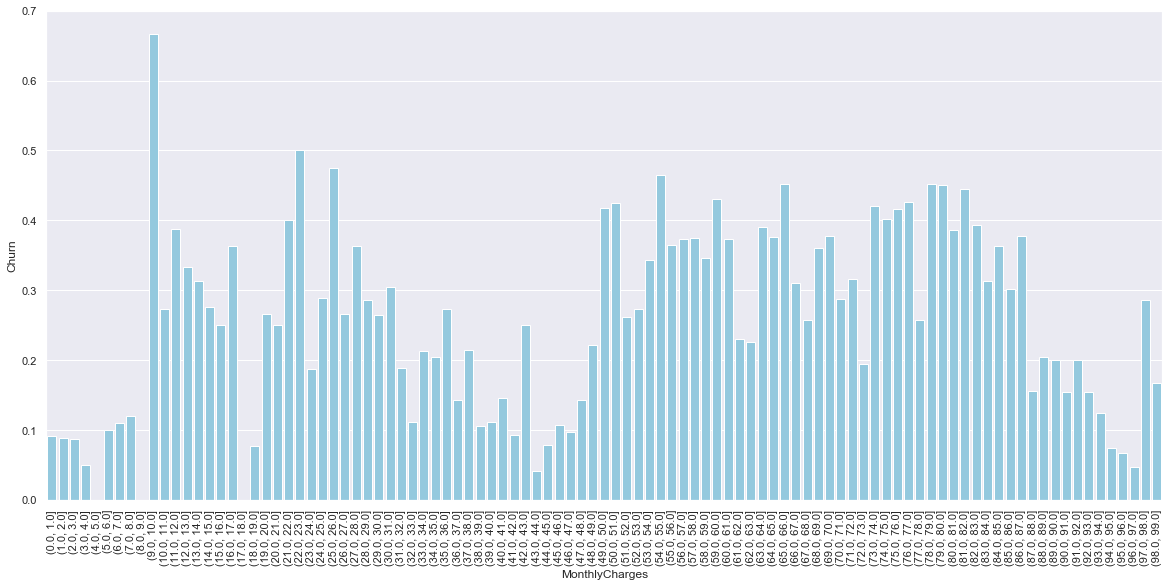

In [22]:
plt.figure(figsize=(20,9))
churn_by_monthlycharges=raw_data[['MonthlyCharges','Churn']].groupby(pd.cut(raw_data['MonthlyCharges'], 
                                                                  np.arange(0,raw_data['MonthlyCharges'].max()+1,))).mean()
ax=sns.barplot(x='MonthlyCharges',y='Churn', data=churn_by_monthlycharges, color='Skyblue')
ax.set_xticklabels(churn_by_monthlycharges.index,rotation=90)
plt.show()


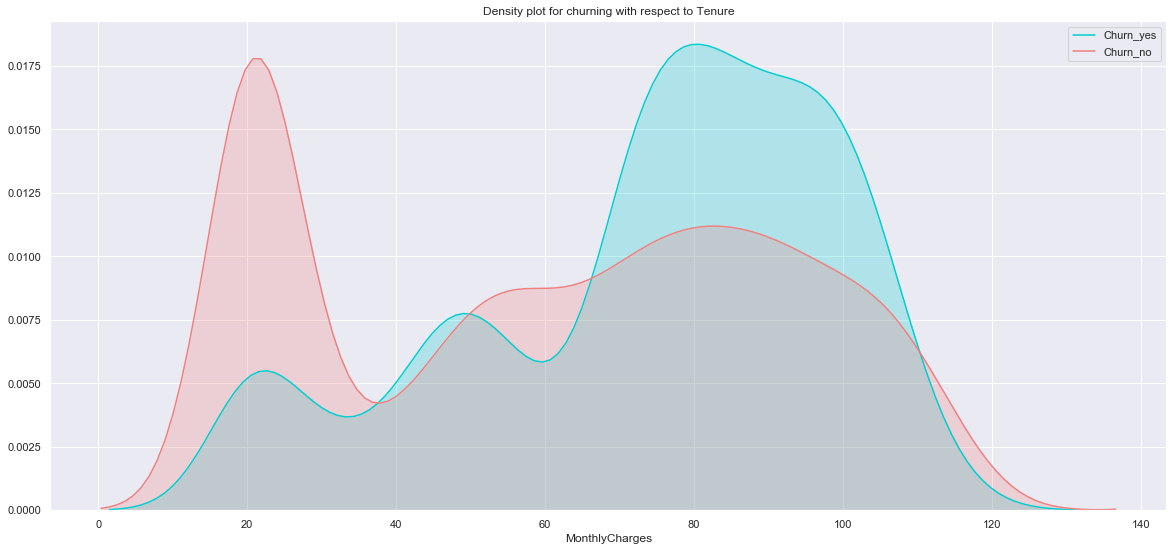

In [23]:
plt.figure(figsize=(20,9))
ax=sns.kdeplot(raw_data['MonthlyCharges'][raw_data.Churn==1],color='darkturquoise', shade=True)
sns.kdeplot(raw_data['MonthlyCharges'][raw_data.Churn==0],color='lightcoral', shade=True)
plt.legend(['Churn_yes','Churn_no'])
plt.title('Density plot for churning with respect to Tenure')
ax.set(xlabel='MonthlyCharges')
plt.show()

The distributions are very much different for the MonthlyCharges v/s Churn. So this might be a significant predictor in our model.

# Exploration of Gender

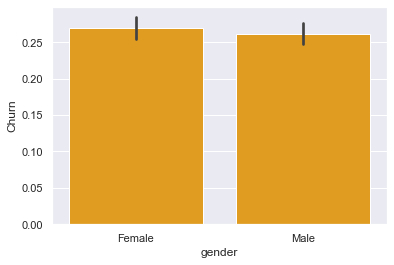

In [24]:
sns.barplot('gender','Churn',data=raw_data, color='orange')
plt.show()

In [25]:
#Checking correlation of gender & Churn
data_corr_matrix=data.corr()
print("correlation between gender & churn: ", data_corr_matrix['gender_Male']['Churn'])

correlation between gender & churn:  -0.008612095078997463


It seems Churn & gender are not correlated.

# Exploration of Senior Citizen, Partner, and Dependents

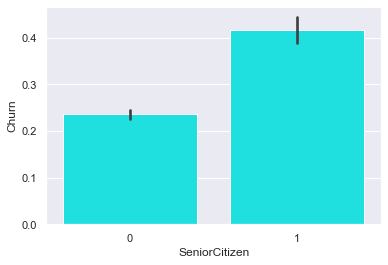

In [26]:
sns.barplot('SeniorCitizen','Churn',data=raw_data, color='cyan')
plt.show()

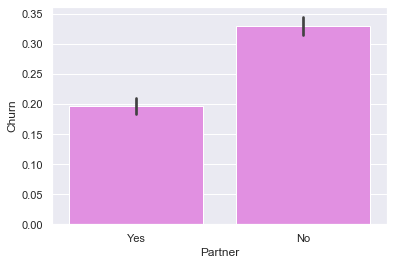

In [27]:
sns.barplot('Partner','Churn',data=raw_data, color='violet')
plt.show()

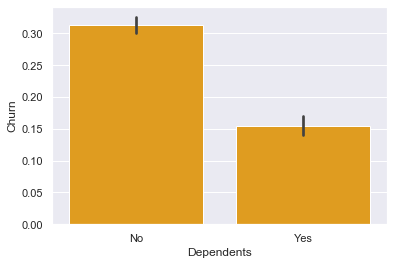

In [28]:
sns.barplot('Dependents','Churn',data=raw_data, color='orange')
plt.show()

In [29]:
data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [30]:
#Checking correlation of Partner_Yes and Dependents_Yes
print("correlation between Partner_Yes & Dependents_Yes: ", data_corr_matrix['Partner_Yes']['Dependents_Yes'])
print("correlation between Partner_Yes & SeniorCitizen: ", data_corr_matrix['Partner_Yes']['SeniorCitizen'])
print("correlation between Dependents_Yes & SeniorCitizen: ", data_corr_matrix['Dependents_Yes']['SeniorCitizen'])

correlation between Partner_Yes & Dependents_Yes:  0.4526762829294439
correlation between Partner_Yes & SeniorCitizen:  0.016478657597413158
correlation between Dependents_Yes & SeniorCitizen:  -0.21118508849394904


Partner_Yes & Dependents_Yes are very much correlated. 
Senior Citizens, People without Partner, and people who are independent are more likely to churn.

# Exploration of Phone Service & multiple lines

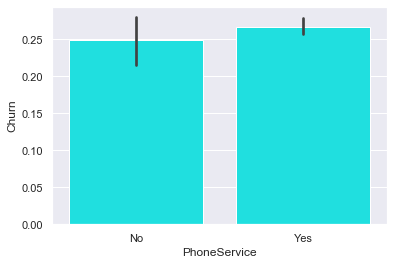

In [31]:
sns.barplot('PhoneService','Churn',data=raw_data, color='cyan')
plt.show()

#### Exploration of Multiple Lines

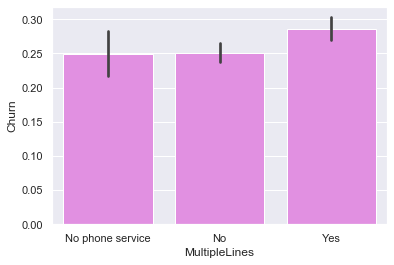

In [32]:
sns.barplot('MultipleLines','Churn',data=raw_data, color='violet')
plt.show()

In [33]:
#Checking correlation of Phone Servive_Yes & MultipleLines_no phone service
print("correlation between OnlineSecurity_Yes & OnlineBackup_Yes: ", data_corr_matrix['PhoneService_Yes']['MultipleLines_No phone service'])


correlation between OnlineSecurity_Yes & OnlineBackup_Yes:  -1.0


PhoneService_Yes & MultipleLines_No phone service have perfect negative correlation, So we should drop the phone service column.

In [34]:
data.drop(['PhoneService_Yes'],axis=1,inplace=True)
data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

# Exploration of InternetService, OnlineSecurity, and OnlineBackup

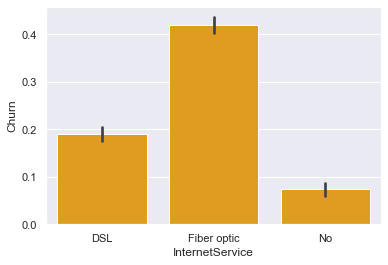

In [35]:
sns.barplot('InternetService','Churn',data=raw_data, color='orange')
plt.show()

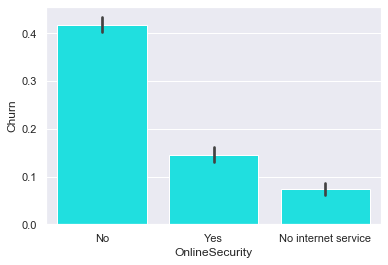

In [36]:
sns.barplot('OnlineSecurity','Churn',data=raw_data, color='cyan')
plt.show()

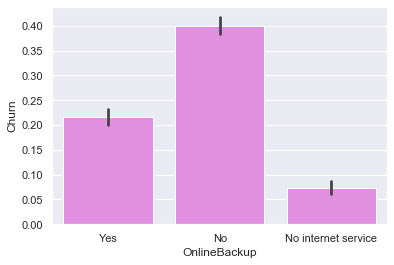

In [37]:
sns.barplot('OnlineBackup','Churn',data=raw_data, color='violet')
plt.show()

All of the columns have "No internet service" as one variable. So we take care of it while in data with dummies

In [38]:
data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [39]:
data.drop(['OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service',
           'TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'], 
            axis=1, inplace=True)
data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [40]:
#Checking correlation of Internet service, Online Security, and Online Backup
print("correlation between OnlineSecurity_Yes & OnlineBackup_Yes: ", data_corr_matrix['OnlineSecurity_Yes']['OnlineBackup_Yes'])
print("correlation between InternetService_Fiber optic & OnlineBackup_Yes: ", data_corr_matrix['InternetService_Fiber optic']['OnlineBackup_Yes'])
print("correlation between OnlineSecurity_Yes & InternetService_Fiber optic: ", data_corr_matrix['OnlineSecurity_Yes']['InternetService_Fiber optic'])

correlation between OnlineSecurity_Yes & OnlineBackup_Yes:  0.28383223353270814
correlation between InternetService_Fiber optic & OnlineBackup_Yes:  0.16565089083393386
correlation between OnlineSecurity_Yes & InternetService_Fiber optic:  -0.03069571096235206


The variables above are not correlated with high values.

## Exploration of DeviceProtection & Techsupport

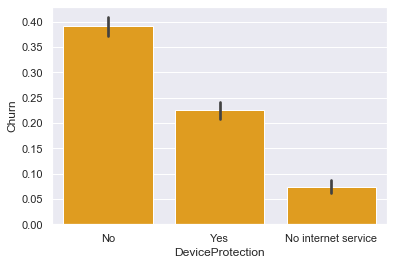

In [41]:
sns.barplot('DeviceProtection','Churn',data=raw_data, color='orange')
plt.show()

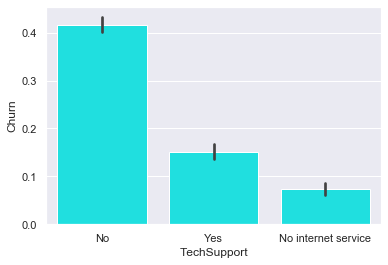

In [42]:
sns.barplot('TechSupport','Churn',data=raw_data, color='cyan')
plt.show()

In [43]:
#Checking correlation of DeviceProtection_Yes & TechSupport_Yes
print("correlation between DeviceProtection_Yes & TechSupport_Yes: ", 
      data_corr_matrix['DeviceProtection_Yes']['TechSupport_Yes'])


correlation between DeviceProtection_Yes & TechSupport_Yes:  0.3333125623154421


## Exploration of StreamingTV, and Streaming Movies

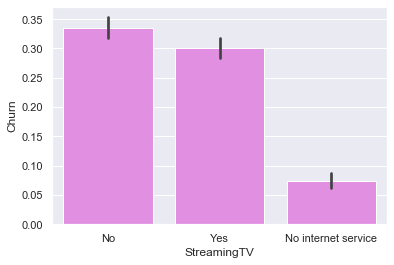

In [44]:
sns.barplot('StreamingTV','Churn',data=raw_data, color='violet')
plt.show()

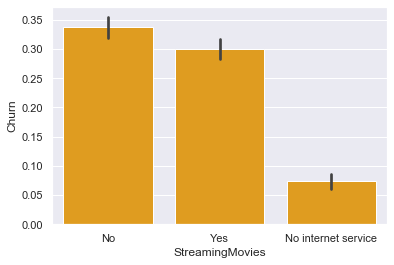

In [45]:
sns.barplot('StreamingMovies','Churn',data=raw_data, color='orange')
plt.show()

In [46]:
data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [47]:
#Checking correlation of StreamingTV_Yes & StreamingMovies_Yes & InternetService_No
print("correlation between StreamingTV_Yes & StreamingMovies_Yes: ", 
      data_corr_matrix['StreamingTV_Yes']['StreamingMovies_Yes'])
print("correlation between StreamingMovies_Yes & InternetService_No: ", 
      data_corr_matrix['StreamingMovies_Yes']['InternetService_No'])
print("correlation between StreamingTV_Yes & InternetService_No: ", 
      data_corr_matrix['StreamingTV_Yes']['InternetService_No'])

correlation between StreamingTV_Yes & StreamingMovies_Yes:  0.5330938326942409
correlation between StreamingMovies_Yes & InternetService_No:  -0.4186750789702281
correlation between StreamingTV_Yes & InternetService_No:  -0.415551893880319


## Exploration of Contract & PaperBilling

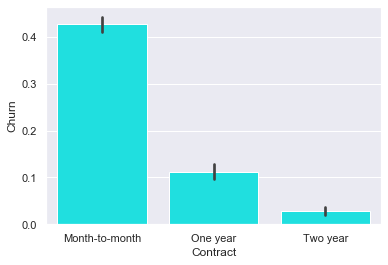

In [48]:
sns.barplot('Contract','Churn',data=raw_data, color='cyan')
plt.show()

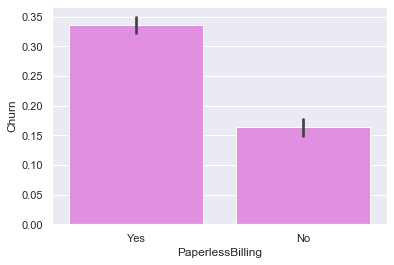

In [49]:
sns.barplot('PaperlessBilling','Churn',data=raw_data, color='violet')
plt.show()

In [50]:
#Checking correlation of PaperlessBilling & InternetService_No
print("correlation between PaperlessBilling_Yes & InternetService_No: ", 
      data_corr_matrix['PaperlessBilling_Yes']['InternetService_No'])

correlation between PaperlessBilling_Yes & InternetService_No:  -0.3210130652332027


## Exploration of Payment Method

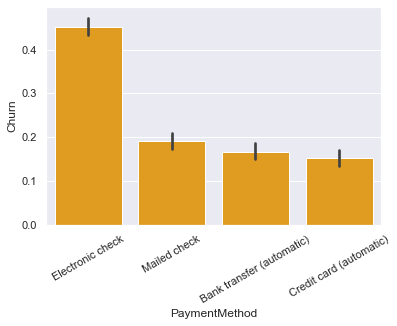

In [51]:
ax=sns.barplot('PaymentMethod','Churn',data=raw_data, color='orange')
ax.set_xticklabels(raw_data['PaymentMethod'].unique(),rotation=30)
plt.show()

In [52]:
raw_data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [53]:
#Checking correlation of PaymentMethod & InternetService_No
print("correlation between PaymentMethod_Mailed check & InternetService_No: ", 
      data_corr_matrix['PaymentMethod_Mailed check']['InternetService_No'])
print("correlation between Electronic check & InternetService_No: ", 
      data_corr_matrix['PaymentMethod_Electronic check']['InternetService_No'])
print("correlation between PaymentMethod_Credit card (automatic) & InternetService_No: ", 
      data_corr_matrix['PaymentMethod_Credit card (automatic)']['InternetService_No'])

correlation between PaymentMethod_Mailed check & InternetService_No:  0.32136073231782275
correlation between Electronic check & InternetService_No:  -0.2849166458500381
correlation between PaymentMethod_Credit card (automatic) & InternetService_No:  0.0010297293228975783


#### Checking cleaned data correlation matrix

In [54]:
corr_matrix= data.corr()
corr_matrix['Churn']

SeniorCitizen                            0.150889
tenure                                  -0.352229
MonthlyCharges                           0.193356
TotalCharges                            -0.199037
Churn                                    1.000000
gender_Male                             -0.008612
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
MultipleLines_No phone service          -0.011942
MultipleLines_Yes                        0.040102
InternetService_Fiber optic              0.308020
InternetService_No                      -0.227890
OnlineSecurity_Yes                      -0.171226
OnlineBackup_Yes                        -0.082255
DeviceProtection_Yes                    -0.066160
TechSupport_Yes                         -0.164674
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
Contract_One year                       -0.177820
Contract_Two year                       -0.302253


In [55]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


## Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
data[['tenure','MonthlyCharges','TotalCharges']]=Scaler.fit_transform(data[['tenure','MonthlyCharges','TotalCharges']])

In [57]:
data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0.066327,-0.259629,-0.173244,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.959674,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0.514251,-0.746535,-0.194766,0,1,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
4,0,-1.236724,0.197365,-0.940470,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,0.665992,-0.128655,0,1,1,1,0,1,...,1,1,1,1,1,0,1,0,0,1
7039,0,1.613701,1.277533,2.243151,0,0,1,1,0,1,...,1,0,1,1,1,0,1,1,0,0
7040,0,-0.870241,-1.168632,-0.854469,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,-1.155283,0.320338,-0.872062,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1


 All features have been scaled

#### Separating inputs and targets

In [58]:
X=data.drop(['Churn'], axis=1)
y=data['Churn']

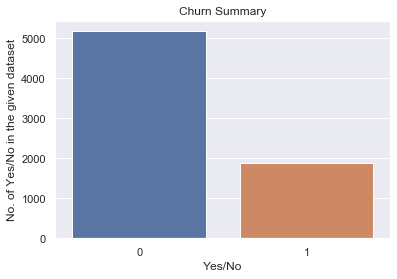

In [59]:
y_frame=y.to_frame()
y_value=y_frame['Churn'].value_counts()
sns.barplot(y_value.index,y_value.values)
plt.title('Churn Summary')
plt.xlabel('Yes/No')
plt.ylabel('No. of Yes/No in the given dataset')
plt.show()

# Feature Selection

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model= LogisticRegression()
rfe= RFE(model,18)
rfe=rfe.fit(X,y)
print("selected features : %s" % list(X.columns[rfe.support_]))

selected features : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Dependents_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']


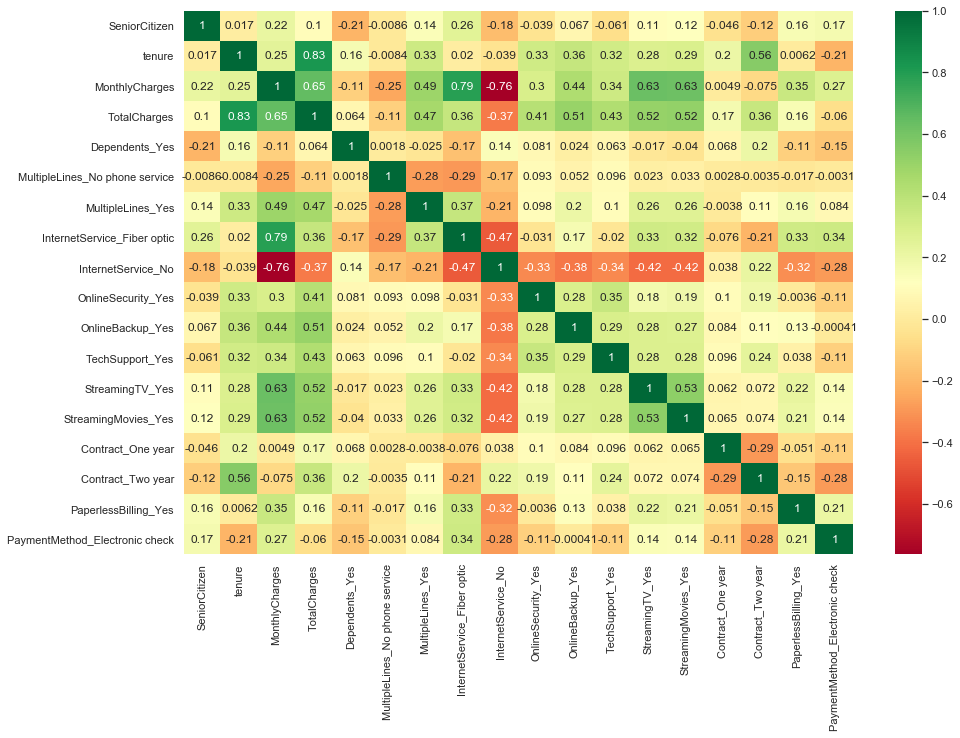

In [61]:
selected_features= list(X.columns[rfe.support_])
X_final=X[selected_features]

plt.subplots(figsize=(15,10))
sns.heatmap(X_final.corr(),annot=True,cmap='RdYlGn')
plt.show()

# Train and test data

Code for saving train & test data.
#Uncomment the cell below to run the program without errors.

In [62]:
"""from sklearn.model_selection import train_test_split
X_train,X_test , y_train, y_test =train_test_split(X,y, test_size=0.2,random_state=42)
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')"""

"from sklearn.model_selection import train_test_split\nX_train,X_test , y_train, y_test =train_test_split(X,y, test_size=0.2,random_state=42)\nX_train.to_csv('X_train.csv')\nX_test.to_csv('X_test.csv')\ny_train.to_csv('y_train.csv')\ny_test.to_csv('y_test.csv')"

In [63]:
X_train=pd.read_csv('X_train.csv')
X_train.drop('Unnamed: 0',axis=1, inplace=True)

X_test=pd.read_csv('X_test.csv')
X_test.drop('Unnamed: 0',axis=1, inplace=True)

y_train=pd.read_csv('y_train.csv')
y_train.drop('Unnamed: 0',axis=1, inplace=True)

y_test=pd.read_csv('y_test.csv')
y_test.drop('Unnamed: 0',axis=1, inplace=True)

# Logistic Regression

In [64]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix

logReg= LogisticRegression()
logReg.fit(X_train[selected_features],np.ravel(y_train))
y_pred_logit=logReg.predict(X_test[selected_features])

In [65]:
print("precision: ", precision_score(y_test,y_pred_logit))
print("accuracy: ", accuracy_score(y_test,y_pred_logit))
print("recall: ", recall_score(y_test,y_pred_logit))
print()
print("classification report: ")
print(classification_report(y_test,y_pred_logit))
print()
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_logit)

precision:  0.6932515337423313
accuracy:  0.8246983676366217
recall:  0.6058981233243967

classification report: 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.61      0.65       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.77      1409
weighted avg       0.82      0.82      0.82      1409


confusion matrix: 


array([[936, 100],
       [147, 226]], dtype=int64)

In [66]:
#for ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

y_pred_logit_prob= logReg.predict_proba(X_test[selected_features])[:,1]
fpr_logit, tpr_logit, thresholds_logit= roc_curve(y_test, y_pred_logit_prob)

# Naive Bayes Classifier

Naive Bayes is useful in very large data sets but this is not a very large dataset.

In [67]:
from sklearn.naive_bayes import GaussianNB
naive_model=GaussianNB()
naive_model.fit(X_train,np.ravel(y_train))

y_pred_naive = naive_model.predict(X_test)

In [68]:
print("precision: ", precision_score(y_test,y_pred_naive))
print("accuracy: ", accuracy_score(y_test,y_pred_naive))
print("recall: ", recall_score(y_test,y_pred_naive))
print()
print("classification report: ")
print(classification_report(y_test,y_pred_naive))
print()
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_naive)

precision:  0.5307557117750439
accuracy:  0.7601135557132718
recall:  0.8096514745308311

classification report: 
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       0.53      0.81      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.81      0.76      0.77      1409


confusion matrix: 


array([[769, 267],
       [ 71, 302]], dtype=int64)

In [69]:
#for ROC curve
y_pred_nv_prob= naive_model.predict_proba(X_test)[:,1]
fpr_nv, tpr_nv, thresholds_nv= roc_curve(y_test, y_pred_nv_prob)

# KNN Classification

In [70]:
from sklearn.neighbors import KNeighborsClassifier

We get maximum test accuracy for k=10, but we will take 9 for our model.

In [71]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':np.arange(1,50)}

knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

knn_cv.best_score_

0.803635516807536

In [72]:
knn_cv.best_params_

{'n_neighbors': 36}

best accuracy score for n_neighbors 36

In [73]:
knn=KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
knn.fit(X_train,np.ravel(y_train))
y_pred_knn=knn.predict(X_test)
knn.score(X_test,y_test)

0.8140525195173882

In [74]:
print("precision: ", precision_score(y_test,y_pred_knn))
print("accuracy: ", accuracy_score(y_test,y_pred_knn))
print("recall: ", recall_score(y_test,y_pred_knn))
print()
print("classification report: ")
print(classification_report(y_test,y_pred_knn))
print()
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_knn)

precision:  0.6739811912225705
accuracy:  0.8140525195173882
recall:  0.5764075067024129

classification report: 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.67      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409


confusion matrix: 


array([[932, 104],
       [158, 215]], dtype=int64)

In [75]:
#for ROC curve

y_pred_knn_prob= knn.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, thresholds_knn= roc_curve(y_test, y_pred_knn_prob)

# Decision Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtree.fit(X_train,np.ravel(y_train))
y_pred_tree=dtree.predict(X_test)

print("precision: ", precision_score(y_test,y_pred_tree))
print("accuracy: ", accuracy_score(y_test,y_pred_tree))
print("recall: ", recall_score(y_test,y_pred_tree))
print()
print("classification report: ")
print(classification_report(y_test,y_pred_tree))
print()
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_tree)

precision:  0.7053140096618358
accuracy:  0.7955997161107168
recall:  0.3914209115281501

classification report: 
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1036
           1       0.71      0.39      0.50       373

    accuracy                           0.80      1409
   macro avg       0.76      0.67      0.69      1409
weighted avg       0.78      0.80      0.77      1409


confusion matrix: 


array([[975,  61],
       [227, 146]], dtype=int64)

In [77]:
#for ROC curve

y_pred_tree_prob= knn.predict_proba(X_test)[:,1]
fpr_tree, tpr_tree, thresholds_tree= roc_curve(y_test, y_pred_tree_prob)

# Random Forest Classifier & Gradient Boosting Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [79]:
from sklearn.pipeline import make_pipeline
pipelines={
    "rf":make_pipeline(RandomForestClassifier(random_state=42)),
    "gb":make_pipeline(GradientBoostingClassifier(random_state=42))
}

rf_hyperparameters={
    "randomforestclassifier__n_estimators":[100,200],
    "randomforestclassifier__max_features":["auto","sqrt",0.33]
}

gb_hyperparameters={
    "gradientboostingclassifier__n_estimators":[100,200],
    "gradientboostingclassifier__learning_rate":[0.05,0.1,0.2],
    "gradientboostingclassifier__max_depth":[1,3,5]
}

hyperparameters={
    "rf": rf_hyperparameters,
    "gb": gb_hyperparameters
}

In [80]:
fitted_models={}
for name, pipeline in pipelines.items():
    models=GridSearchCV(pipeline,hyperparameters[name],cv=10, n_jobs=-1)
    models.fit(X_train,np.ravel(y_train))
    
    fitted_models[name]=models
    print(name, " has been fitted")

rf  has been fitted
gb  has been fitted


In [81]:
for name,model in fitted_models.items():
    print(name, model.best_score_)

rf 0.7896637189322651
gb 0.8012008238539738


In [82]:
for name,model in fitted_models.items():
    y_pred=model.predict(X_test)
    print(name)
    print("------------------")
    print()
    print("precision: ", precision_score(y_test,y_pred))
    print("accuracy: ", accuracy_score(y_test,y_pred))
    print("recall: ", recall_score(y_test,y_pred))
    print()
    print("classification report: ")
    print(classification_report(y_test,y_pred))
    print()
    print("confusion matrix: ")
    print(confusion_matrix(y_test,y_pred))
    print()

rf
------------------

precision:  0.6541353383458647
accuracy:  0.7934705464868701
recall:  0.46648793565683644

classification report: 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409


confusion matrix: 
[[944  92]
 [199 174]]

gb
------------------

precision:  0.68561872909699
accuracy:  0.8140525195173882
recall:  0.5495978552278821

classification report: 
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409


confusion matrix: 
[[942  94

In [83]:
fitted_models['gb'].best_estimator_

Pipeline(memory=None,
         steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.2, loss='deviance',
                                            max_depth=1, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=200,
                                            n_iter_no_change=None,
                                            presort='deprecated',
                                

In [84]:
gbc= GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.2, loss='deviance',
                                            max_depth=1, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=200,
                                            n_iter_no_change=None,
                                            presort='deprecated',
                                            random_state=42, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False)
gbc.fit(X_train,np.ravel(y_train))
y_pred_gbc=gbc.predict(X_test)

In [85]:
#for ROC curve

y_pred_gbc_prob= gbc.predict_proba(X_test)[:,1]
fpr_gbc, tpr_gbc, thresholds_gbc= roc_curve(y_test, y_pred_gbc_prob)

# Comparing Logistic, Naive Bayes, KNN, Decision tree, Random forest & Gradient boosting classifiers

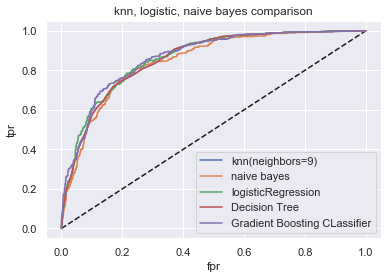

In [86]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_knn,tpr_knn, label='knn(neighbors=9)')
plt.plot(fpr_nv,tpr_nv, label='naive bayes')
plt.plot(fpr_logit,tpr_logit, label='logisticRegression')
plt.plot(fpr_tree,tpr_tree, label='Decision Tree')
plt.plot(fpr_gbc,tpr_gbc, label='Gradient Boosting CLassifier')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.title("knn, logistic, naive bayes comparison")
plt.show()

In [87]:
print("ROC AUC score for knn: ",roc_auc_score(y_test, y_pred_knn_prob))
print("ROC AUC score for naive bayes: ",roc_auc_score(y_test, y_pred_nv_prob))
print("ROC AUC score for logistic regression: ",roc_auc_score(y_test, y_pred_logit_prob))
print("ROC AUC score for Decision Tree Classifier: ",roc_auc_score(y_test, y_pred_tree_prob))
print("ROC AUC score for Gradient boosting Classifier: ",roc_auc_score(y_test, y_pred_gbc_prob))

ROC AUC score for knn:  0.8573990497582991
ROC AUC score for naive bayes:  0.8475123438260168
ROC AUC score for logistic regression:  0.8627079300671794
ROC AUC score for Decision Tree Classifier:  0.8573990497582991
ROC AUC score for Gradient boosting Classifier:  0.8659245706832837


### Precisions

In [88]:
print("precision for logistic regression: ", precision_score(y_test,y_pred_logit))
print("precision for knn: ", precision_score(y_test,y_pred_knn))
print("precision for naive bayes: ", precision_score(y_test,y_pred_naive))
print("precision for Decision tree classifier: ", precision_score(y_test,y_pred_tree))
print("precision for Gradiest Boosting Classifier: ", precision_score(y_test,y_pred_gbc))

precision for logistic regression:  0.6932515337423313
precision for knn:  0.6739811912225705
precision for naive bayes:  0.5307557117750439
precision for Decision tree classifier:  0.7053140096618358
precision for Gradiest Boosting Classifier:  0.68561872909699


### Accuracies

In [89]:
print("logistic regression: ", accuracy_score(y_test,y_pred_logit))
print("knn: ", accuracy_score(y_test,y_pred_knn))
print("naive bayes: ",accuracy_score(y_test,y_pred_naive))
print("Decision tree classifier: ", accuracy_score(y_test,y_pred_tree))
print("Gradiest Boosting Classifier: ", accuracy_score(y_test,y_pred_gbc))

logistic regression:  0.8246983676366217
knn:  0.8140525195173882
naive bayes:  0.7601135557132718
Decision tree classifier:  0.7955997161107168
Gradiest Boosting Classifier:  0.8140525195173882


### Recalls

In [90]:
print("logistic regression: ", recall_score(y_test,y_pred_logit))
print("knn: ", recall_score(y_test,y_pred_knn))
print("naive bayes: ",recall_score(y_test,y_pred_naive))
print("Decision tree classifier: ", recall_score(y_test,y_pred_tree))
print("Gradiest Boosting Classifier: ", recall_score(y_test,y_pred_gbc))

logistic regression:  0.6058981233243967
knn:  0.5764075067024129
naive bayes:  0.8096514745308311
Decision tree classifier:  0.3914209115281501
Gradiest Boosting Classifier:  0.5495978552278821


### Comments on all models

ALl of the above models seem to perform similar and not with very great accuracy
Of all the above classifiers, logistic regression seems to have performed well.

# Checking distribution of yes and nos in Churn in our training data set

Distribution of people who moved and who did not
0    4138
1    1496
Name: Churn, dtype: int64


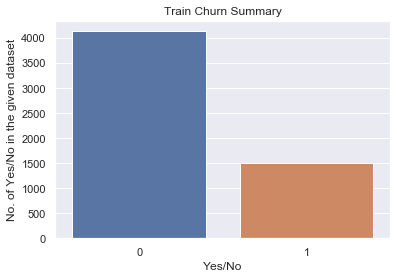

In [91]:
print("Distribution of people who moved and who did not")
print(y_train.Churn.value_counts())
sns.countplot(x='Churn',data=y_train)
plt.title('Train Churn Summary')
plt.xlabel('Yes/No')
plt.ylabel('No. of Yes/No in the given dataset')
plt.show()

The distribution is has a clear difference. We need to get equal no. of both cases to get a better model

# Changing the training dataset with equal distribution of targets

# And Again fitting the models

In [92]:
X_train['Churn']=y_train['Churn']
new_df = X_train.groupby('Churn').apply(lambda x: x.sample(n=1400)).reset_index(drop = True)
X_train2=new_df.drop('Churn',axis=1)
y_train2=new_df['Churn']


# Logistic Regression

In [93]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix

logReg2= LogisticRegression()
logReg2.fit(X_train2,np.ravel(y_train2))
y_pred_logit2=logReg2.predict(X_test)

# Naive Bayes Classifier

In [94]:
from sklearn.naive_bayes import GaussianNB
naive_model2=GaussianNB()
naive_model2.fit(X_train2,np.ravel(y_train2))

y_pred_naive2 = naive_model2.predict(X_test)

# KNN Classification

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn2=KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
knn2.fit(X_train2,np.ravel(y_train2))
y_pred_knn2=knn2.predict(X_test)
knn2.score(X_test,y_test)

0.7310149041873669

# Decision Tree Classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier
dtree2=DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtree2.fit(X_train2,np.ravel(y_train2))
y_pred_tree2=dtree2.predict(X_test)


### Precisions

In [98]:
print("precision for logistic regression: ", precision_score(y_test,y_pred_logit2))
print("precision for knn: ", precision_score(y_test,y_pred_knn2))
print("precision for naive bayes: ", precision_score(y_test,y_pred_naive2))
print("precision for Decision tree classifier: ", precision_score(y_test,y_pred_tree2))

precision for logistic regression:  0.5399305555555556
precision for knn:  0.4952681388012618
precision for naive bayes:  0.5032362459546925
precision for Decision tree classifier:  0.48120300751879697


### Comments

After filtering the training data, precision is lower than before in all the models.

That might be because of reduction in training data drastically. So, should keep the model trained with the complete training data set.

Logistic Regression Model shoul be used in predicting the churn for this type of dataset.

#### LogReg model to be used in prediction of Churns